# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Hidayatullah Wildan Ghaly Buchary
- **Email:** wildanghaly1@gmail.com
- **ID Dicoding:** wildan_ghaly

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh musim terhadap total peminjaman sepeda?
- Jam berapa saja yang paling banyak mengalami peminjaman sepeda pada hari kerja dibandingkan dengan akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [250]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [251]:
hour_df = pd.read_csv('./data/hour.csv')
day_df = pd.read_csv('./data/day.csv')

In [252]:
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [253]:
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [254]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [255]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- Ada 17378 baris dan 17 kolom di dataset peminjaman sepeda berdasasrkan jam
- Ada 731 baris dan 16 kolom di dataset peminjaman sepeda berdasarkan hari
- Tipe data dari kedua dataset adalah int64, object, dan float64

### Assessing Data

In [256]:
def assess_data(input_df):
    total_null          = input_df.isnull().sum()
    total_duplicate     = input_df.duplicated().sum()
    total_na            = input_df.isna().sum()
    
    return total_null, total_duplicate, total_na

In [257]:
# Hasil dari assess_data untuk hour_df
hour_df_null, hour_df_duplicate, hour_df_na     = assess_data(hour_df)

print("Analisis Data untuk Hour DataFrame")
print("Total Nilai Null:", hour_df_null.to_dict())
print("Total Duplikat:", hour_df_duplicate)
print("Total Nilai NA:", hour_df_na.to_dict())

Analisis Data untuk Hour DataFrame
Total Nilai Null: {'instant': 0, 'dteday': 0, 'season': 0, 'yr': 0, 'mnth': 0, 'hr': 0, 'holiday': 0, 'weekday': 0, 'workingday': 0, 'weathersit': 0, 'temp': 0, 'atemp': 0, 'hum': 0, 'windspeed': 0, 'casual': 0, 'registered': 0, 'cnt': 0}
Total Duplikat: 0
Total Nilai NA: {'instant': 0, 'dteday': 0, 'season': 0, 'yr': 0, 'mnth': 0, 'hr': 0, 'holiday': 0, 'weekday': 0, 'workingday': 0, 'weathersit': 0, 'temp': 0, 'atemp': 0, 'hum': 0, 'windspeed': 0, 'casual': 0, 'registered': 0, 'cnt': 0}


In [258]:
# Hasil dari assess_data untuk day_df
day_df_null, day_df_duplicate, day_df_na = assess_data(day_df)

print("Analisis Data untuk Day DataFrame")
print("Total Nilai Null:", day_df_null.to_dict())
print("Total Duplikat:", day_df_duplicate)
print("Total Nilai NA:", day_df_na.to_dict())

Analisis Data untuk Day DataFrame
Total Nilai Null: {'instant': 0, 'dteday': 0, 'season': 0, 'yr': 0, 'mnth': 0, 'holiday': 0, 'weekday': 0, 'workingday': 0, 'weathersit': 0, 'temp': 0, 'atemp': 0, 'hum': 0, 'windspeed': 0, 'casual': 0, 'registered': 0, 'cnt': 0}
Total Duplikat: 0
Total Nilai NA: {'instant': 0, 'dteday': 0, 'season': 0, 'yr': 0, 'mnth': 0, 'holiday': 0, 'weekday': 0, 'workingday': 0, 'weathersit': 0, 'temp': 0, 'atemp': 0, 'hum': 0, 'windspeed': 0, 'casual': 0, 'registered': 0, 'cnt': 0}


**Insight:**
- Tidak ditemukan adanya data yang kosong atau duplikat dalam dataset peminjaman sepeda berdasarkan jam
- Tidak ditemukan adanya data yang kosong atau duplikat dalam dataset peminjaman sepeda berdasaran hari

### Cleaning Data

In [259]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

print(day_df.dtypes)
print(hour_df.dtypes)

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object
instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


**Insight:**
- Outlier belum perlu dicari karena pertanyaan awal tidak memerlukan hal ini untuk dilakukan
- Kolom dteday dikonversi menjadi menggunakan format yang sesuai

## Exploratory Data Analysis (EDA)

In [260]:
hour_df.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [261]:
day_df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [262]:
print("Hour dataset columns:", hour_df.columns.tolist())
print("Day dataset columns:", day_df.columns.tolist())

Hour dataset columns: ['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
Day dataset columns: ['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


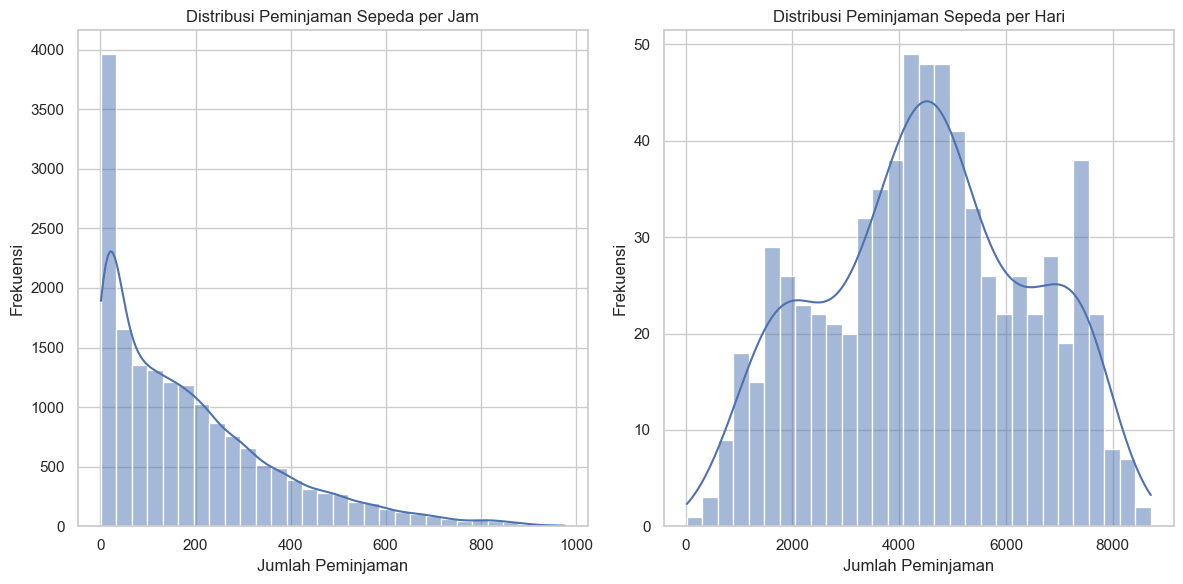

In [263]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(hour_df['cnt'], bins=30, kde=True)
plt.title('Distribusi Peminjaman Sepeda per Jam')
plt.xlabel('Jumlah Peminjaman')
plt.ylabel('Frekuensi')

plt.subplot(1, 2, 2)
sns.histplot(day_df['cnt'], bins=30, kde=True)
plt.title('Distribusi Peminjaman Sepeda per Hari')
plt.xlabel('Jumlah Peminjaman')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

### Analisis pertanyaan 1

In [264]:
seasonal_rentals = day_df.groupby('season')['cnt'].sum().reset_index()
seasonal_rentals

,season,cnt
0,1,471348
1,2,918589
2,3,1061129
3,4,841613


### Analisis pertanyaan 2

In [265]:
hour_df['is_weekend'] = hour_df['weekday'].apply(lambda x: 1 if x in [5, 6] else 0)

hourly_rentals = hour_df.groupby(['hr', 'is_weekend'])['cnt'].sum().unstack()
hourly_rentals

is_weekend,0,1
hr,,
0,23775,15355
1,14476,9688
2,9725,6627
3,5098,3076
4,3035,1393
5,10921,3340
6,43564,11568
7,122895,31276
8,200904,60097


**Insight:**
- Tipe persebaran data peminjaman sepeda per hari menyerupai tipe distribusi normal
- Terdapat 17379 data dalam dataset peminjaman sepeda berdasarkan jam dan 731 data dalam dataset peminjaman sepeda berdasarkan hari
- Peminjaman data bedasarkan hari dapat dibagi ke dalam empat musim

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh musim terhadap total peminjaman sepeda?

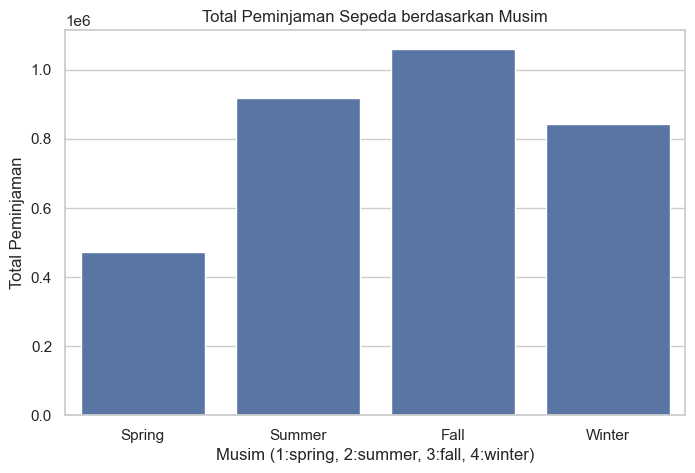

In [266]:
plt.figure(figsize=(8, 5))
sns.barplot(x='season', y='cnt', data=seasonal_rentals)
plt.title('Total Peminjaman Sepeda berdasarkan Musim')
plt.xlabel('Musim (1:spring, 2:summer, 3:fall, 4:winter)')
plt.ylabel('Total Peminjaman')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()

### Pertanyaan 2: Jam berapa saja yang paling banyak mengalami peminjaman sepeda pada hari kerja dibandingkan dengan akhir pekan?

<Figure size 1200x600 with 0 Axes>

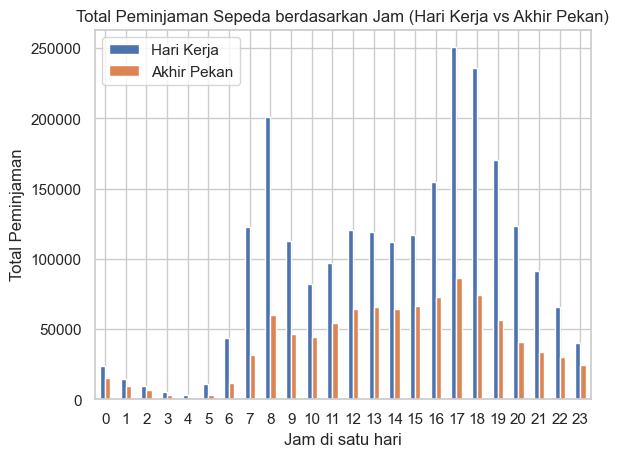

In [267]:
plt.figure(figsize=(12, 6))
hourly_rentals.plot(kind='bar')
plt.title('Total Peminjaman Sepeda berdasarkan Jam (Hari Kerja vs Akhir Pekan)')
plt.xlabel('Jam di satu hari')
plt.ylabel('Total Peminjaman')
plt.xticks(rotation=0)
plt.legend(['Hari Kerja', 'Akhir Pekan'])
plt.show()

**Insight:**
- Total peminjaman sepeda terbanyak berada pada musim gugur (fall)
- Total peminjaman sepeda paling sedikit berada pada musim semi (spring)
- Peminjaman sepeda setiap jam pada hari kerja maupun akhir pekan memiliki grafik yang mirip
- Peminjaman sepeda pada hari kerja memiliki peningkatan signifikan pada sekitar jam 17

## Analisis Lanjutan (Opsional)

### Analisis Korelasi

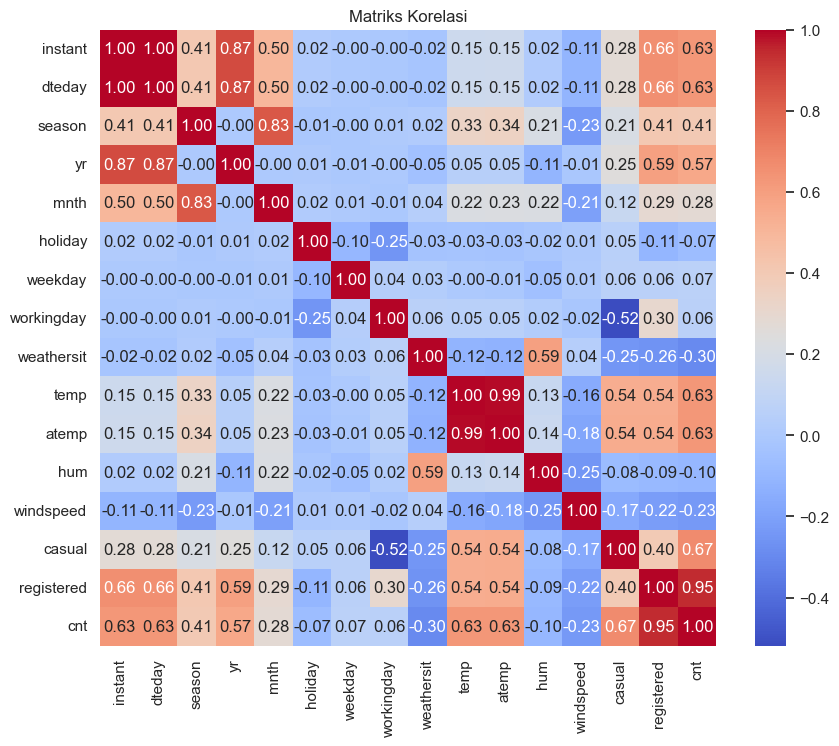

In [268]:
correlation_matrix = day_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matriks Korelasi')
plt.show()

- Semakin mendekati angka 1, semakin kuat korelasi positif (berbanding lurus) antara dua variabel.
- Angka 0 menunjukkan tidak ada hubungan yang signifikan antara kedua variabel tersebut.
- Semakin mendekati angka -1, semakin kuat korelasi negatif (berbanding terbalik) antara dua variabel.

### Analisis untuk jumlah peminjaman sepeda berdasarkan waktu dini hari, pagi, siang, dan malam

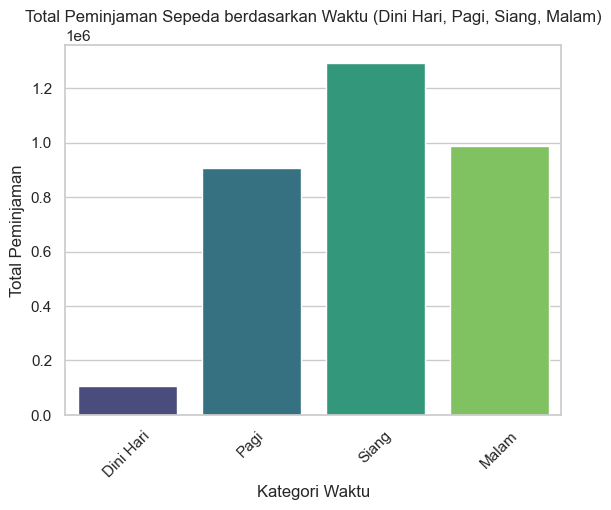

Statistik Peminjaman berdasarkan Kategori Waktu (Diperbarui):
  time_category      cnt
0     Dini Hari   106509
1          Pagi   907319
2         Siang  1292742
3         Malam   986109


In [269]:
def categorize_time_updated(hour):
    if hour < 6:
        return 'Dini Hari'
    elif hour < 12:
        return 'Pagi'
    elif hour < 18:
        return 'Siang'
    else:
        return 'Malam'

hour_df['time_category'] = hour_df['hr'].apply(categorize_time_updated)

order = ['Dini Hari', 'Pagi', 'Siang', 'Malam']
hour_df['time_category'] = pd.Categorical(hour_df['time_category'], categories=order, ordered=True)

time_rentals_updated = hour_df.groupby('time_category', observed=True)['cnt'].sum().reset_index()

sns.barplot(x='time_category', y='cnt', hue='time_category', data=time_rentals_updated, palette='viridis', legend=False)
plt.title('Total Peminjaman Sepeda berdasarkan Waktu (Dini Hari, Pagi, Siang, Malam)')
plt.xlabel('Kategori Waktu')
plt.ylabel('Total Peminjaman')
plt.xticks(rotation=45)
plt.show()

print("Statistik Peminjaman berdasarkan Kategori Waktu (Diperbarui):")
print(time_rentals_updated)

- Kebanyakan sepeda yang dipinjam ada di waktu siang hari
- Hanya sedikit sepeda yang dipinjam pada waktu dini hari

## Conclusion

- Musim mempengaruhi jumlah peminjaman sepeda, di mana musim semi (spring) memiliki jumlah peminjam sepeda terendah, sementara musim gugur (fall) memiliki jumlah peminjam sepeda terbanyak.
- Berdasarkan data, jumlah peminjaman sepeda di hari kerja selalu lebih banyak dibandingkan di akhir pekan